# Introduction to Laplace Transforms in Python

In this demo, we show (following Carl Sandrock's notes https://dynamics-and-control.readthedocs.io/en/latest/) how to use SymPy to evaluate forward and inverse Laplace transforms. We also discuss nice ways of plotting Laplace transforms in the complex plane.

First, we import SymPy. Following Sandrock, we define wrappers $\texttt{L}$ and $\texttt{invL}$ to keep our code clean. 

In [33]:
import sympy as sp

# improve sympy display setting
sp.init_printing()

def L(f):
    return sp.laplace_transform(f,t,s, noconds=True)

def invL(F):
    return sp.inverse_laplace_transform(F,s,t)

We'll also need some packages for plotting, especially the helpful cplot library (https://pypi.org/project/cplot/). 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cplot # warning: this is my "homebrew verion" of cplot (the only thing I've changed is fontsize and some labels), so on your machine
# it may appear differently

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
%config InlineBackend.figure_format='retina'

# Finally, print nice Latex labels for figures. 
# Comment these out if you don't want to wait for the tex to compile, or don't
# want to bother get tex working. 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# also, we should manually set the dpi for figures so they look good
# if saving figs, you should do so at a much higher dpi!
dpi = 300
plt.rcParams['figure.dpi']= dpi

## Example 1: Verifying the Laplace Transform of the Heaviside Function

We already know that 
\begin{equation}
\widehat{\theta} = \frac{1}{s}.
\end{equation}
We should check that SymPy reproduces this result!

In [34]:
t, s = sp.symbols('t,s')
f = sp.functions.special.delta_functions.Heaviside(t, H0=1 / 2) # The "H0" param is the value at t=0, which is taken to be 
# 1/2 in engineering... in fact, 1/2 is the default parameter value for SymPy, so our code is longer than it needs to be :) 
f

In [35]:
F=L(f)
F

Great! SymPy is doing what it's supposed to be doing. Now let's plot $F(s)$ with cplot. 

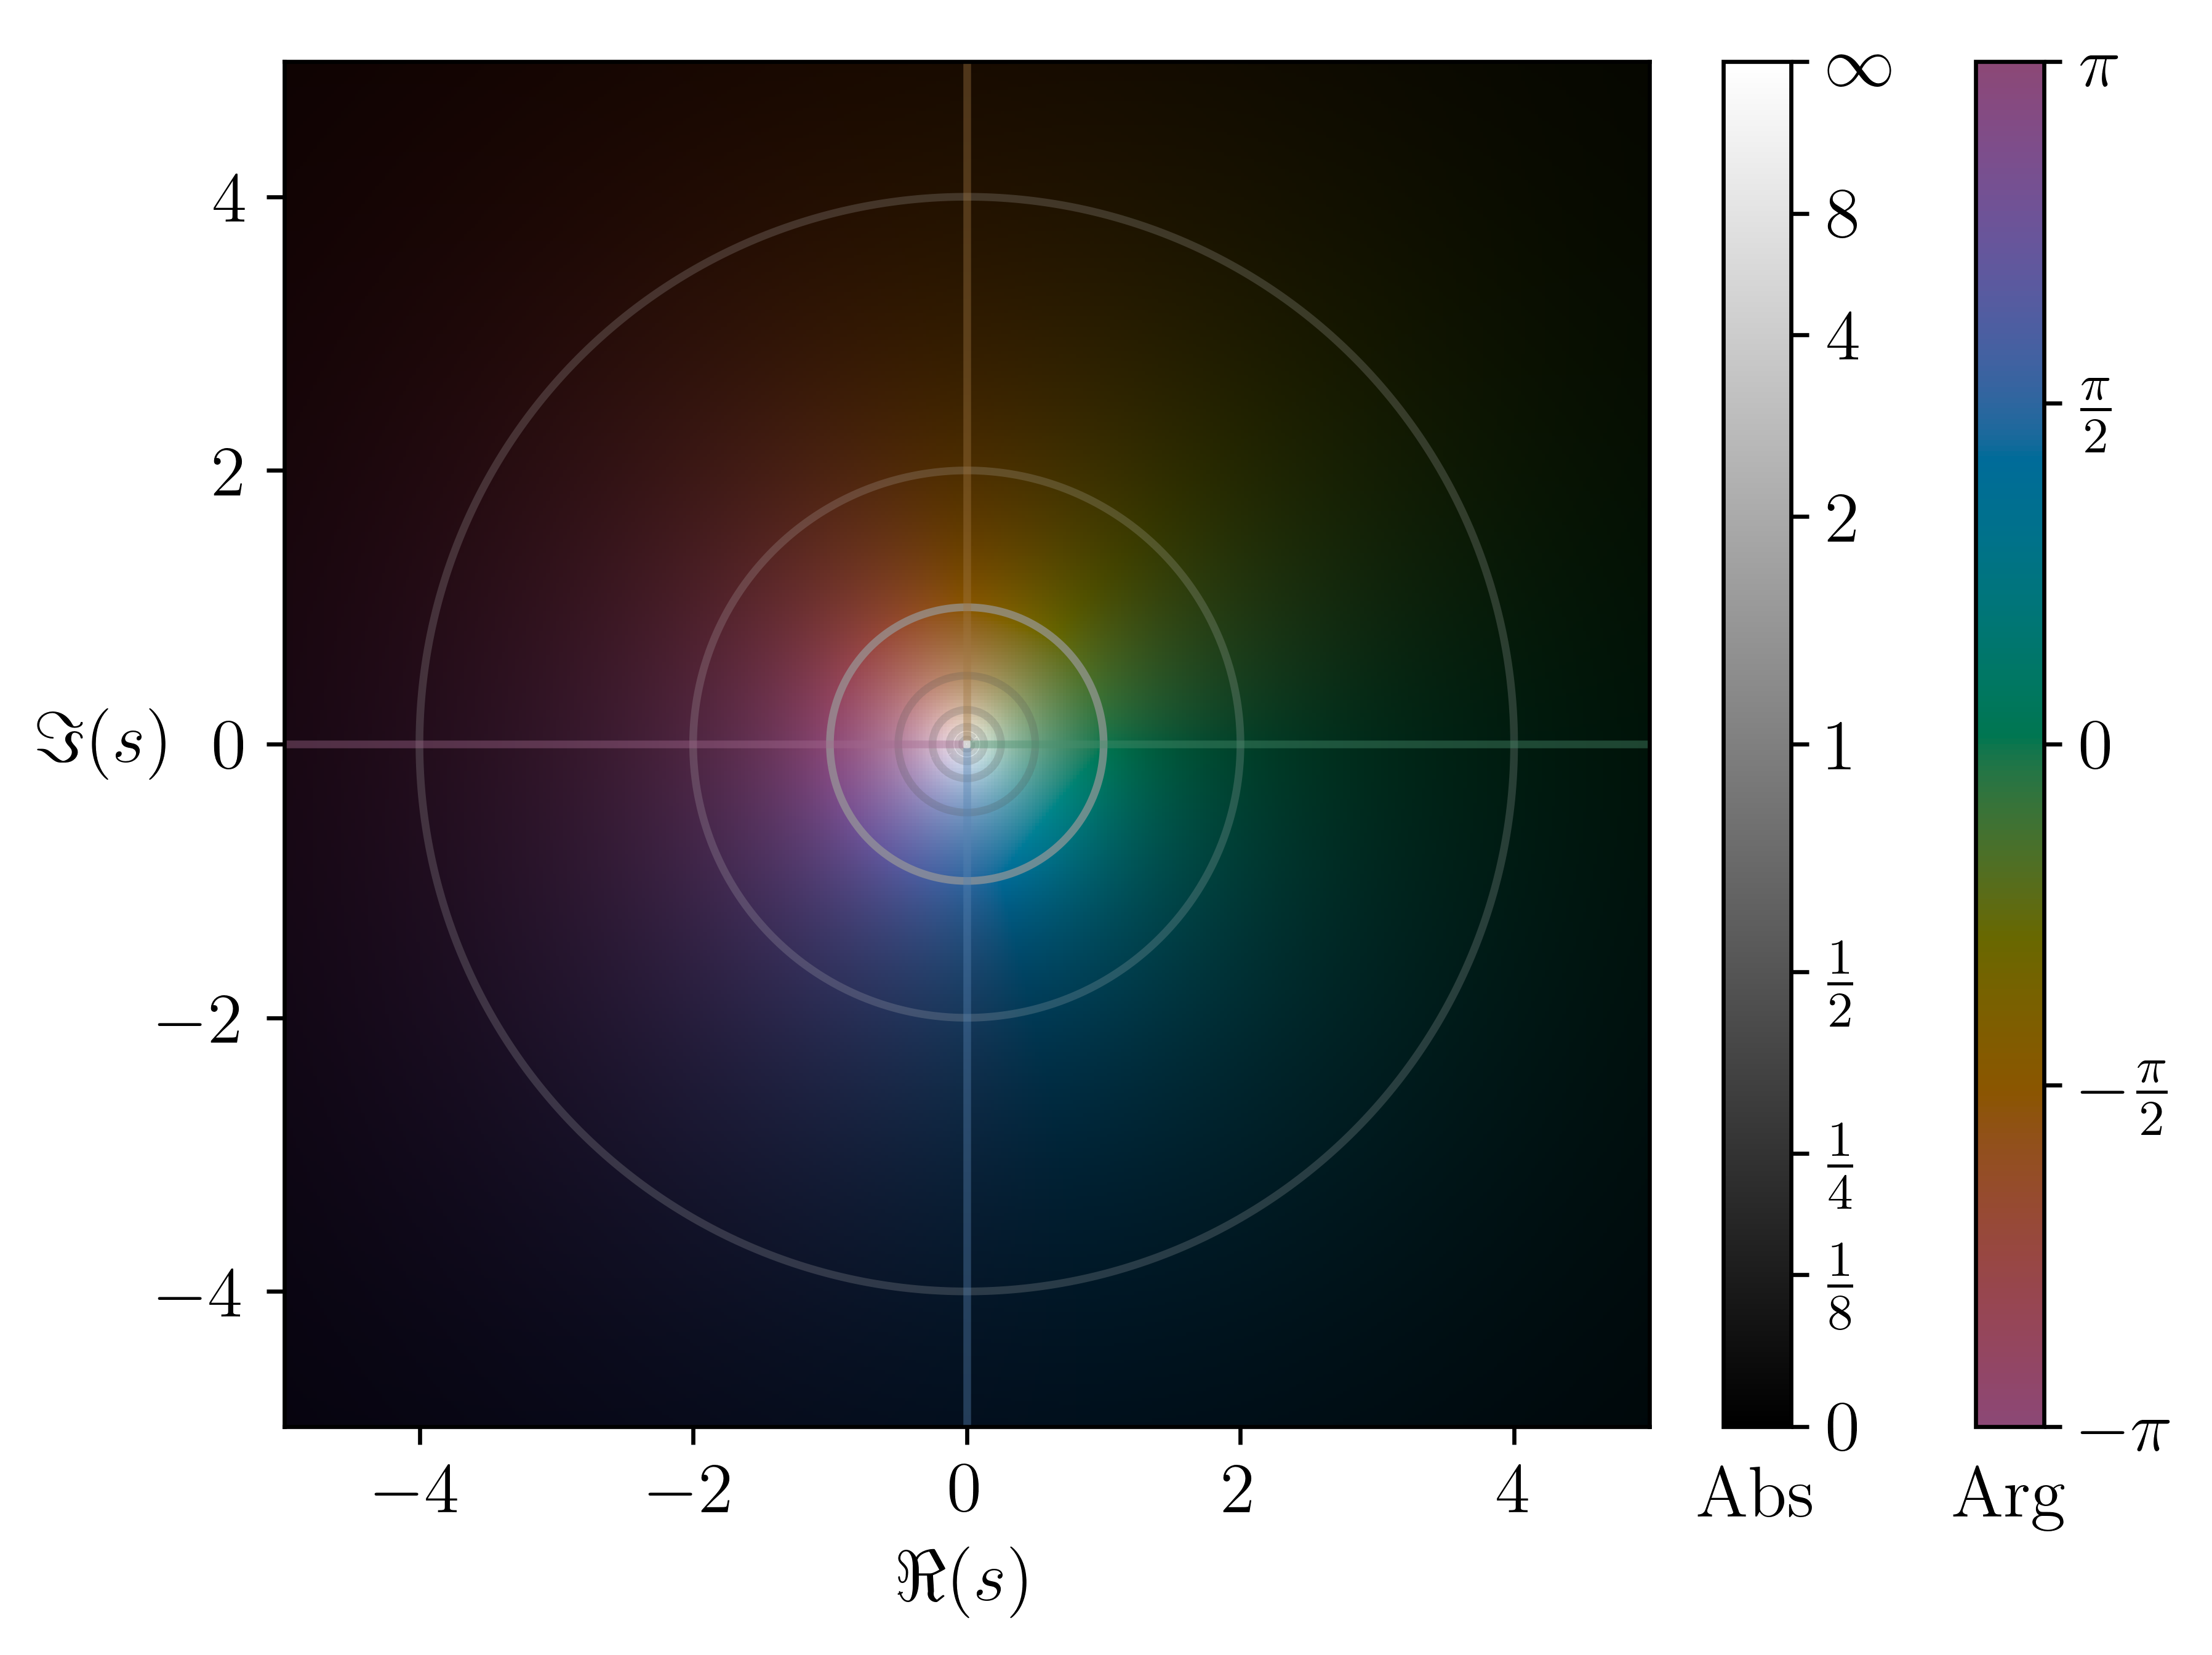

In [10]:
plt = cplot.plot(lambda s: 1./s, (-5.0, +5.0, 400), (-5.0, +5.0, 400))
#plt.savefig('heaviside_lt', bbox_inches='tight', dpi=800)
plt.show()

A reminder that I've tweaked the labels in cplot, so if you run this code on your own compute the picture will look slightly different. 

The figure uses **domain colouring**: the brightness represents magnitude $|F(s)|$, and the colour represents $\text{arg}F(s)$. The pole of $F(s)=1/s$ at $s=0$ is represented by a white dot at the origin. We also see that $|F(s)|$ turns completely dark as we move away from the origin, as expected. Additionally, the grayscale circles are isolines of $|F(s)|$, and the flat lines making a cross shape are isolines of $\text{arg}F(s)$: a bit of complex arithmetic shows that the flat lines have the colours they should have.   

Finally, let's check that the SymPy inverse Laplace transform is doing what it should. 

In [37]:
ff = invL(F)
ff

Again, all is well. 

## Example 2: A More Complicated Function 

Let's try something we haven't computed by hand before. For real parameters $\omega_0>0$, $\zeta\in [0,1)$, consider the function 

$$
h(t) = \frac{1}{\omega_0\sqrt{1-\zeta^2}}e^{-\omega_0\zeta t}\sin\left(t\omega_0\sqrt{1-\zeta^2}\right)\theta(t)
$$

As we'll see soon, this is the **impulse response** of a damped harmonic oscillator controlled via an external force, with only position being observable. This Laplace transform for particular values of $\omega_0, \zeta$ is easily found with SymPy.  

In [42]:
w0 = 1. 
z = 0.5
zz = w0*(1.-z**2)**0.5

h = (1./(zz))*sp.exp(-w0*z*t)*sp.sin(zz*t)
h

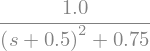

In [43]:
H = L(h)
H

So, the Laplace transform $H(s)=\widehat{h}(s)$ is a rational function with two poles. Let's plot this function...

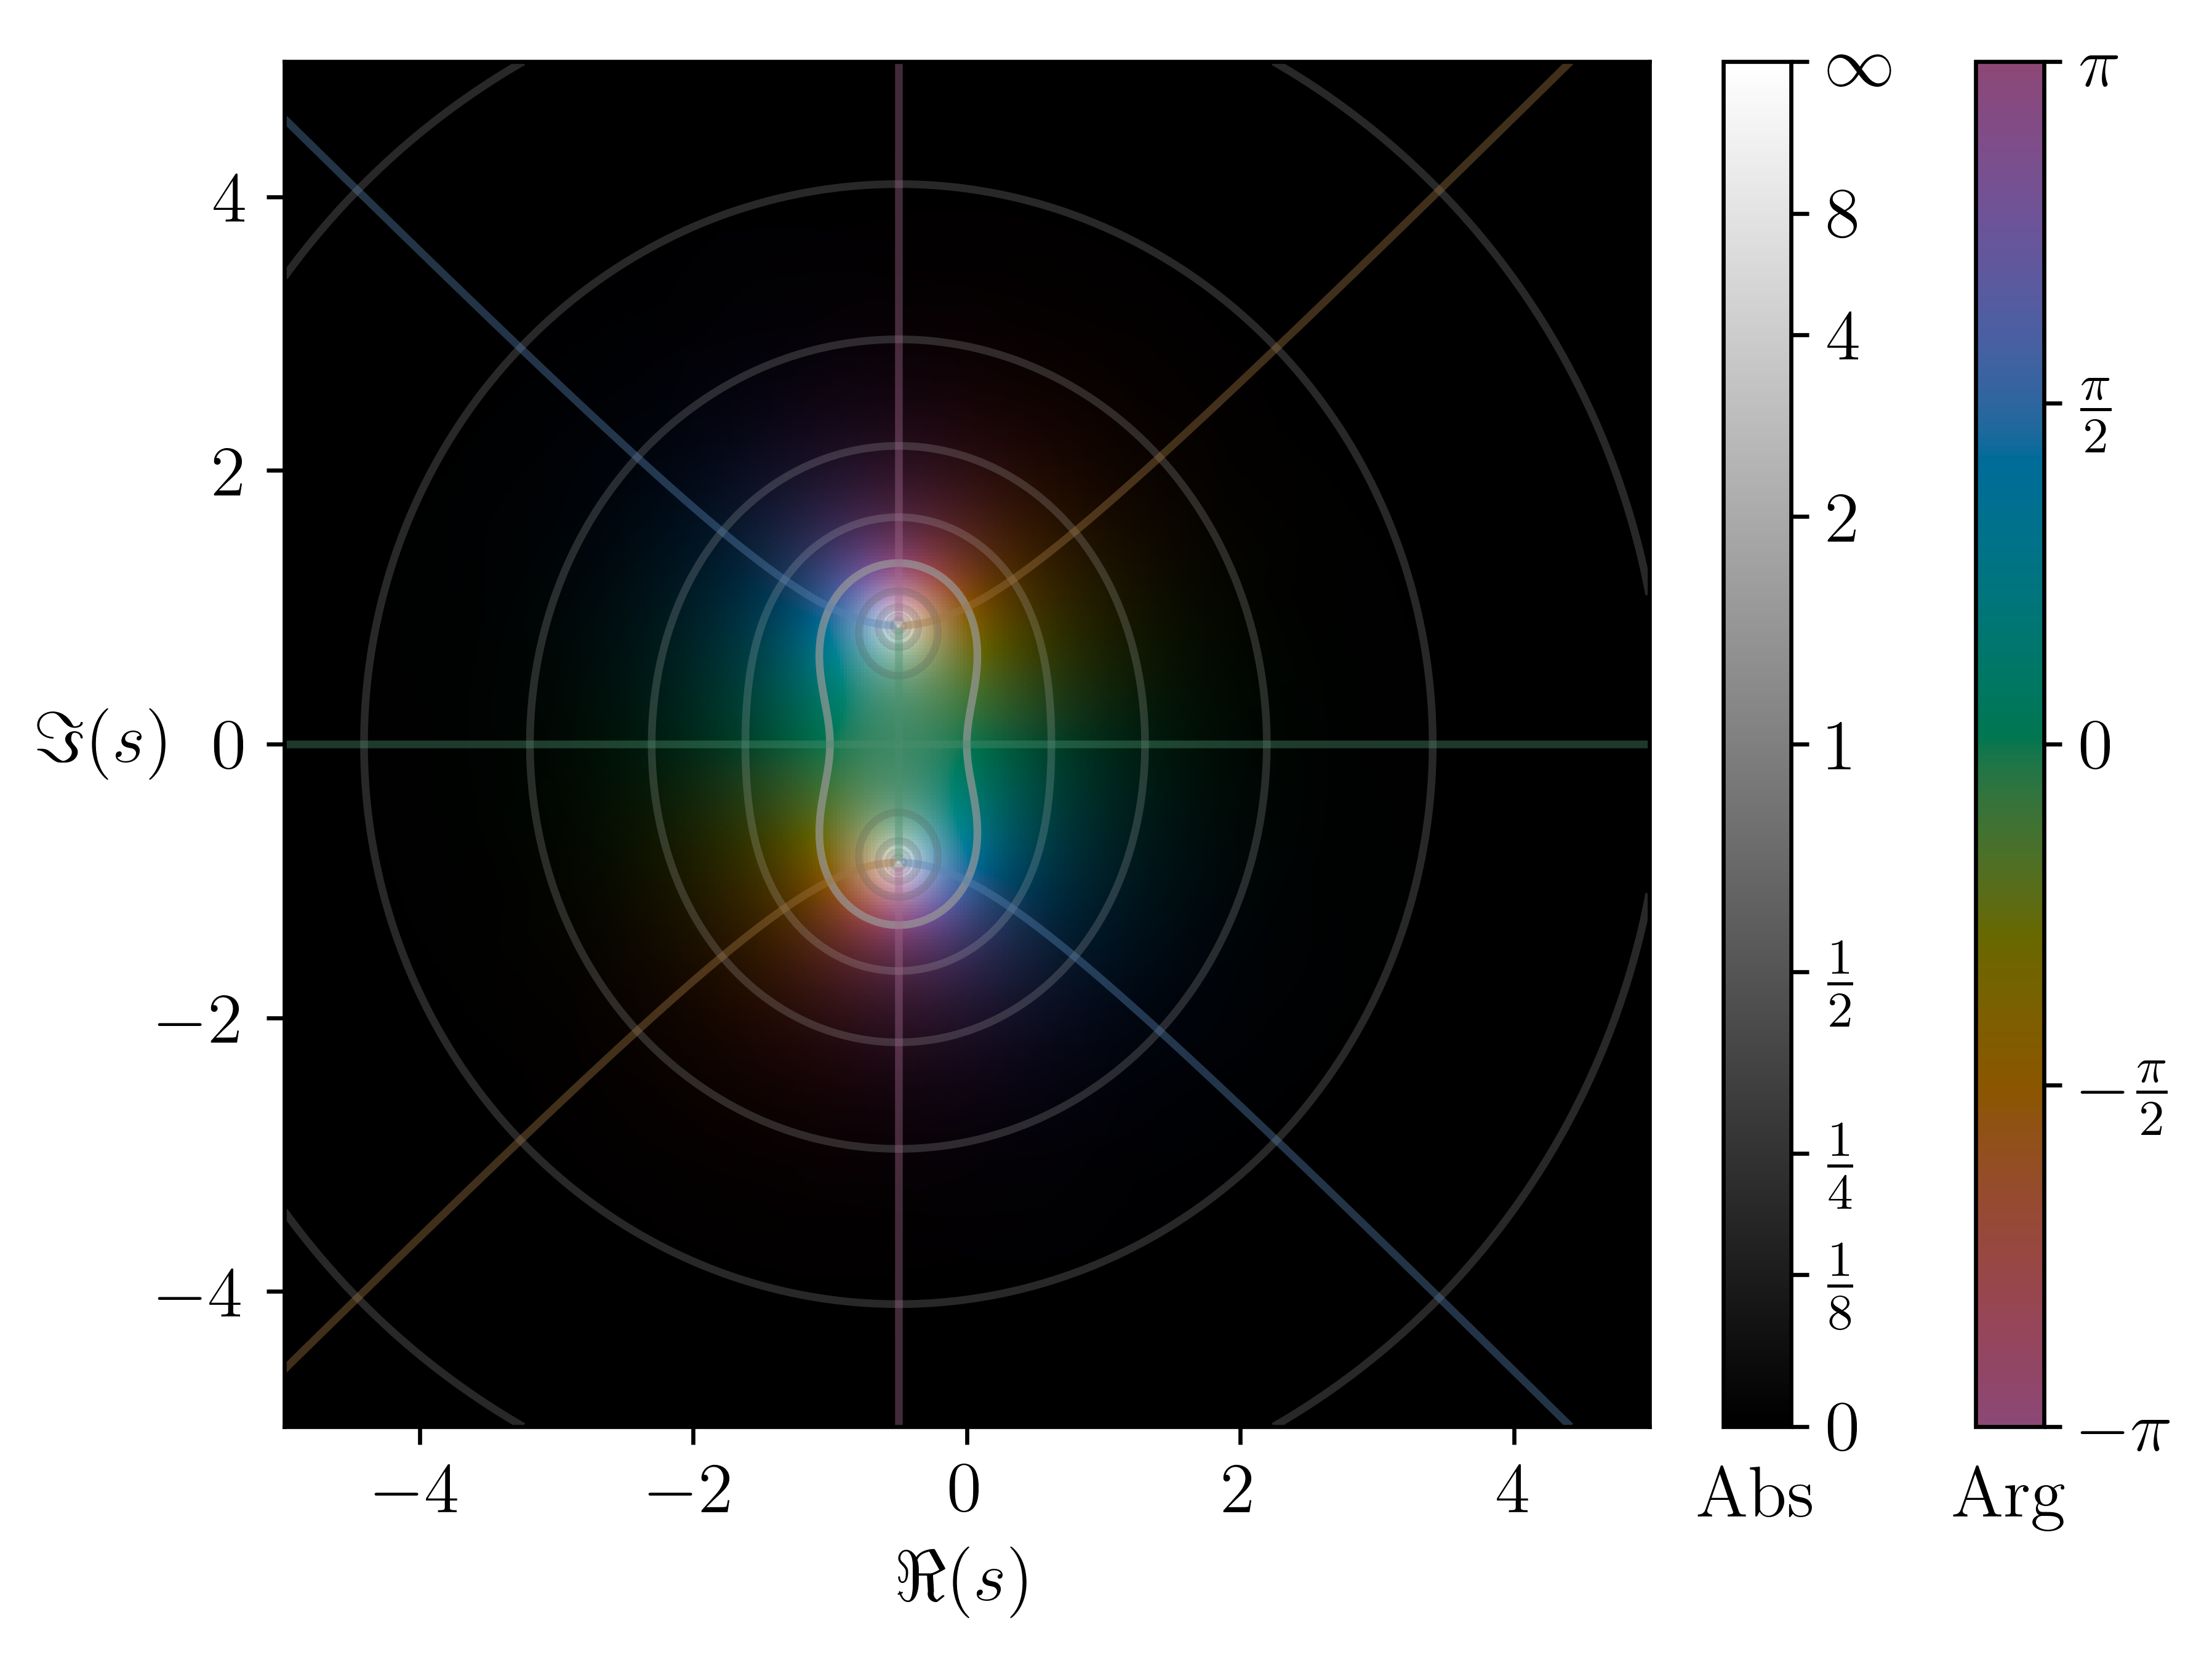

In [30]:
plt = cplot.plot(sp.lambdify(s, H), (-5.0, +5.0, 400), (-5.0, +5.0, 400))
#plt.savefig('sho_lt', bbox_inches='tight', dpi=800)
plt.show()

For $\zeta>0$, the two poles lie in the left half-plane. You should mess around with the parameters $\omega_0$, $\zeta$ and see how this affects the plot, and in particular the poles (try out the undamped case $\zeta=0$).  

Finally, let's double-check the inverse Laplace transform.

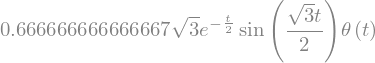

In [41]:
hh = invL(H)
hh

To properly compare this to $\texttt{t}$, we need to numerically evaluate $\sqrt{3}$: 

In [45]:
2.*np.sqrt(3)/3.

Again, we're in the clear! SymPy's inverse Laplace transform routine is doing what it should. 